In [7]:
import numpy as np
from testbed import TestBed
from epsilon_greedy import EpsilonGreedy
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<AxesSubplot:xlabel='beds', ylabel='dist'>

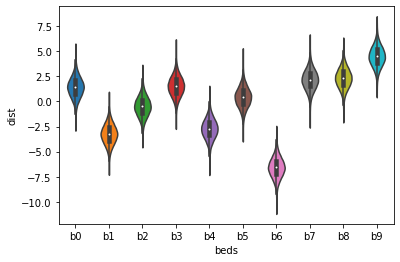

In [8]:
testbed10 = TestBed(10, 1993)
dist = [testbed10.get_dist(i, size=50000) for i in range(10)]
beds = [np.full_like(dist[i], f"b{i}", dtype=object) for i in range(10)]
df = pd.DataFrame({"beds": np.concatenate(beds), "dist": np.concatenate(dist)})
sns.violinplot(x=df["beds"], y=df["dist"], width=0.5, saturation=0.9)

In [2]:
def do_single_run(num_bandits, steps, epsilon, alpha, seed1, seed2):
  testbed = TestBed(num_bandits, seed1)
  epg = EpsilonGreedy(epsilon, testbed, alpha, seed2)
  return epg.run(steps, 10000)

def avg_runs(num_bandits, num_runs, steps, epsilon, alpha, seed, workers=1):
  rng = np.random.default_rng(seed)
  rewards = Parallel(n_jobs=workers)(delayed(do_single_run)(num_bandits, steps, epsilon, alpha, rng.integers(10000), rng.integers(10000)) for _ in range(num_runs))
  return np.mean(np.array(rewards), axis=0)

In [5]:
rewards_epsi_0_1 = avg_runs(num_bandits=10, num_runs=2000, steps=10000, epsilon=0.1, alpha=0.01, seed=1993, workers=5)
rewards_epsi_0_01 = avg_runs(num_bandits=10, num_runs=2000, steps=10000, epsilon=0.01, alpha=0.01, seed=1993, workers=5)
rewards_epsi_0 = avg_runs(num_bandits=10, num_runs=2000, steps=10000, epsilon=0, alpha=0.01, seed=1993, workers=5)

Finished step: 10000, elapsed time: 0.18460006899840664
Finished step: 10000, elapsed time: 0.2063939530053176
Finished step: 10000, elapsed time: 0.24297013199247885
Finished step: 10000, elapsed time: 0.25017164800374303
Finished step: 10000, elapsed time: 0.29892372600443196
Finished step: 10000, elapsed time: 0.18142639999859966
Finished step: 10000, elapsed time: 0.23734877900278661
Finished step: 10000, elapsed time: 0.16801117800059728
Finished step: 10000, elapsed time: 0.17986752100114245
Finished step: 10000, elapsed time: 0.3109526329935761
Finished step: 10000, elapsed time: 0.23931690500467084
Finished step: 10000, elapsed time: 0.2559200010000495
Finished step: 10000, elapsed time: 0.21100069899694063
Finished step: 10000, elapsed time: 0.33905272498668637
Finished step: 10000, elapsed time: 0.15789599700656254
Finished step: 10000, elapsed time: 0.3001498520025052Finished step: 10000, elapsed time: 0.18191226999624632

Finished step: 10000, elapsed time: 0.24093840499699

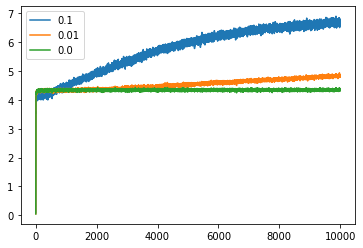

In [6]:
plt.plot(rewards_epsi_0_1, label = "0.1")
plt.plot(rewards_epsi_0_01, label = "0.01")
plt.plot(rewards_epsi_0, label = "0.0")
plt.legend()
plt.show()